# Projet:
 ## Classification des Espèces de Manchots de Palmer par Régression Logistique : Analyse et Prédiction à partir de Données Biologiques et Environnementales

## Auteur : Fidèle Ledoux

## Résumé du Projet
Ce projet vise à analyser un ensemble de données sur les manchots (penguins) collectées dans l'archipel de Palmer, près de l'Antarctique. L'objectif principal est de prédire l'espèce des manchots (Adelie ou Gentoo) en utilisant des techniques de régression logistique. Le dataset comprend des variables telles que la longueur du bec, la masse corporelle, le régime alimentaire, et les métriques de santé. Les étapes du projet incluent la préparation des données, l'exploration, le nettoyage, la modélisation et l'évaluation des performances du modèle. Les visualisations (histogrammes, boxplots, cartes de chaleur) sont utilisées pour mieux comprendre les données. Enfin, le meilleur modèle est sauvegardé pour un déploiement ultérieur.

### 1. Préparation des Données

#### 1.1 Importation des Bibliothèques

In [69]:
# Manipulation et analyse de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Modélisation et évaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Prétraitement
from sklearn.preprocessing import OneHotEncoder

# Sauvegarde du modèle
import joblib

#### 1.2 Chargement des Données

In [70]:
# Chargement du dataset
df = pd.read_csv('palmerpenguins_extended.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


In [71]:
# Affichage des premières lignes du dataset
print(df.head())

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            53.4           17.8              219.0   
1  Adelie  Biscoe            49.3           18.1              245.0   
2  Adelie  Biscoe            55.7           16.6              226.0   
3  Adelie  Biscoe            38.0           15.6              221.0   
4  Adelie  Biscoe            60.7           17.9              177.0   

   body_mass_g     sex  diet life_stage health_metrics  year  
0       5687.0  female  fish      adult     overweight  2021  
1       6811.0  female  fish      adult     overweight  2021  
2       5388.0  female  fish      adult     overweight  2021  
3       6262.0  female  fish      adult     overweight  2021  
4       4811.0  female  fish   juvenile     overweight  2021  


#### 1.3 Filtrage des Données

In [72]:
# Exclusion de l'espèce Chinstrap
df = df[df['species'] != 'Chinstrap']
print(df['species'].value_counts())

species
Adelie    1560
Gentoo    1247
Name: count, dtype: int64


 ##### Commentaire: 
 Le DataFrame ne conserver que les espèces Adelie et Gentoo, en excluant l'espèce Chinstrap. Le résultat affiché montre la répartition des deux espèces restantes.
 Cela permet de se concentrer sur la classification binaire pour la régression logistique

### 2. Exploration des Données

#### 2.1 Informations Générales

In [73]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2807 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            2807 non-null   object 
 1   island             2807 non-null   object 
 2   bill_length_mm     2807 non-null   float64
 3   bill_depth_mm      2807 non-null   float64
 4   flipper_length_mm  2807 non-null   float64
 5   body_mass_g        2807 non-null   float64
 6   sex                2807 non-null   object 
 7   diet               2807 non-null   object 
 8   life_stage         2807 non-null   object 
 9   health_metrics     2807 non-null   object 
 10  year               2807 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 263.2+ KB
None


#### 2.2 Occurrences des Îles

island
Biscoe       1785
Torgensen     512
Dream         510
Name: count, dtype: int64


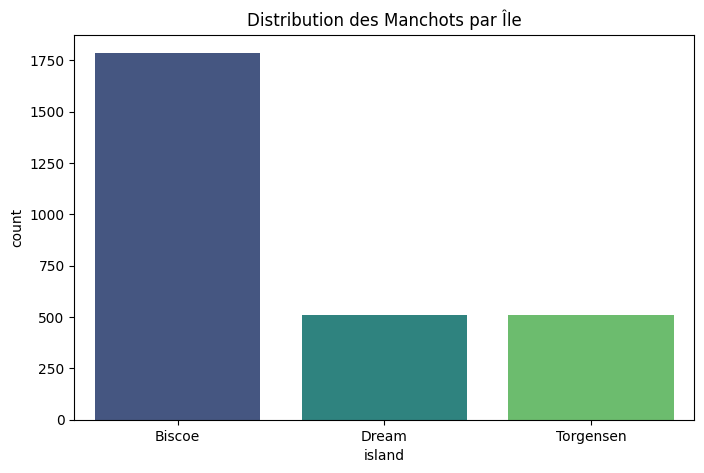

In [74]:
print(df['island'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='island', hue='island', palette='viridis', legend=False)
plt.title('Distribution des Manchots par Île')
plt.show()

##### Commentaire: 
Le graphique montre la répartition des manchots selon les différentes îles de l'archipel de Palmer. On observe que la majorité des manchots se trouvent sur l'île Biscoe, suivie par Dream et Torgersen. Cette distribution peut refléter des différences d'habitat, de ressources alimentaires ou de préférences d'espèces selon les îles. Cette information est utile pour comprendre la structure spatiale de la population de manchots et peut influencer la modélisation ultérieure.

#### 2.3 Répartition des Espèces

species
Adelie    1560
Gentoo    1247
Name: count, dtype: int64


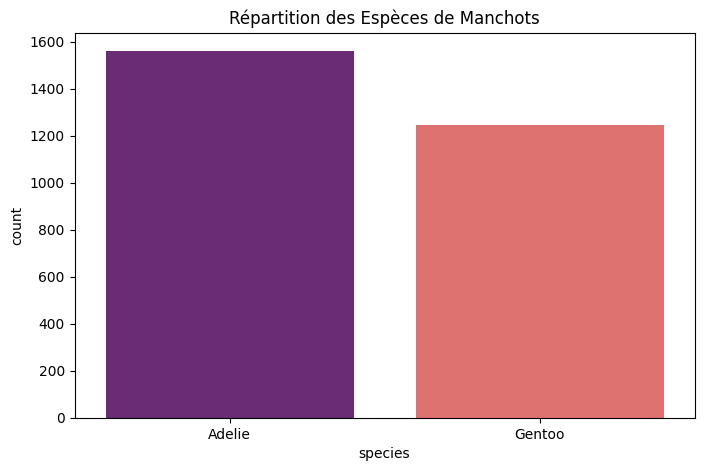

In [75]:
print(df['species'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='species', hue='species', palette='magma', legend=False)
plt.title('Répartition des Espèces de Manchots')
plt.show()

##### Commentaire :  
Le graphique de répartition des espèces montre un déséquilibre entre les deux classes, avec une majorité d'individus appartenant à l'espèce Adelie par rapport à Gentoo. Cette distribution peut influencer la performance du modèle de régression logistique, notamment en termes de biais de prédiction vers la classe majoritaire. Il sera donc important de prendre en compte ce déséquilibre lors de l'évaluation du modèle, par exemple en utilisant des métriques adaptées ou des techniques de rééchantillonnage si nécessaire.  
La visualisation permet également de confirmer que le filtrage des données a bien été effectué, ne conservant que les espèces Adelie et Gentoo pour une classification binaire.

#### 2.4 Statuts de Santé

health_metrics
healthy        1222
overweight     1025
underweight     560
Name: count, dtype: int64


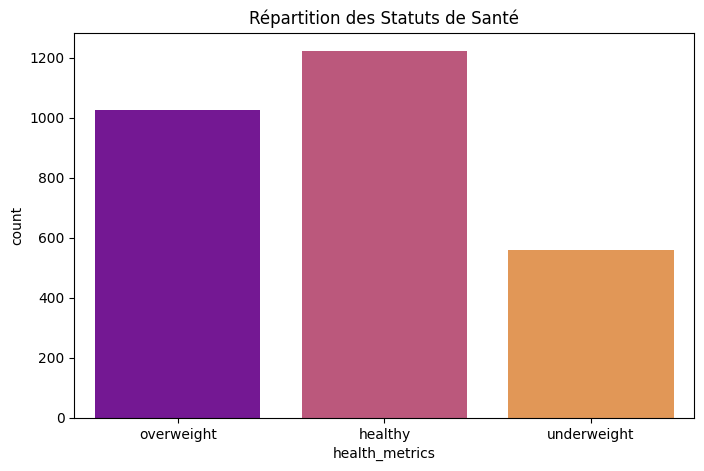

In [76]:
print(df['health_metrics'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='health_metrics', hue='health_metrics', palette='plasma', legend=False)
plt.title('Répartition des Statuts de Santé')
plt.show()

##### Commentaire :
Le graphique de répartition des statuts de santé montre la distribution des différentes catégories de santé parmi les manchots du dataset. On observe que la majorité des manchots sont classés comme "healthy", tandis qu'une proportion non négligeable présente un statut "overweight" ou d'autres statuts de santé. Cette information est importante car l'état de santé peut influencer d'autres variables biologiques ou comportementales, et pourrait également avoir un impact sur la prédiction de l'espèce. La visualisation permet ainsi d'identifier d'éventuels déséquilibres ou tendances dans la population étudiée.

#### 2.5 Statistiques Descriptives

In [77]:
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g  \
count     2807.000000    2807.000000        2807.000000   2807.000000   
mean        39.310011      18.452903         208.216958   4886.241539   
std         13.516420       2.829290          29.679380   1346.491023   
min         13.600000       9.100000         140.000000   2477.000000   
25%         29.100000      16.500000         186.000000   3856.000000   
50%         35.500000      18.400000         204.000000   4681.000000   
75%         48.600000      20.300000         228.000000   5728.500000   
max         88.200000      27.900000         308.000000  10549.000000   

              year  
count  2807.000000  
mean   2023.365159  
std       1.313713  
min    2021.000000  
25%    2022.000000  
50%    2024.000000  
75%    2025.000000  
max    2025.000000  


#### 2.6 Visualisations Supplémentaires

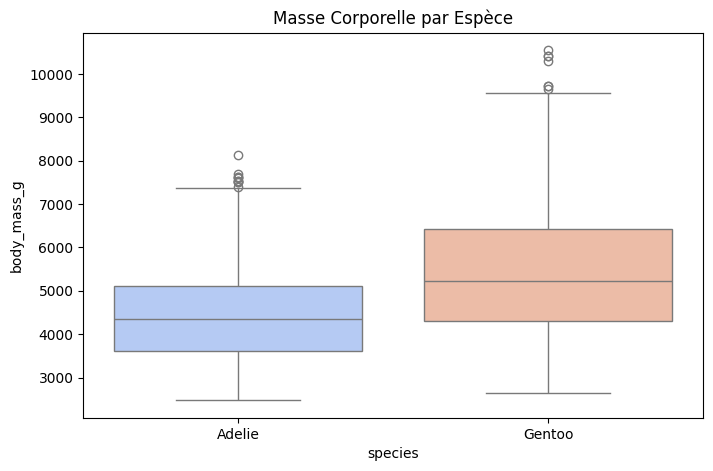

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='species', y='body_mass_g', hue='species', palette='coolwarm', legend=False)
plt.title('Masse Corporelle par Espèce')
plt.show()

##### Commentaire :
Les analyses précédentes montrent une répartition déséquilibrée des espèces, avec une majorité de manchots Adelie par rapport aux Gentoo. La distribution par île indique que la plupart des manchots résident sur l'île Biscoe, ce qui peut refléter des préférences écologiques ou des conditions environnementales favorables. Les visualisations des statuts de santé révèlent que la majorité des individus sont en bonne santé, mais une proportion notable présente un surpoids, ce qui pourrait influencer certaines caractéristiques biologiques. Enfin, les boxplots illustrent des différences de masse corporelle entre les espèces, suggérant que cette variable pourrait être discriminante pour la classification. Ces observations guideront le choix des variables et l'interprétation des résultats lors de la modélisation.

### 3. Préparation et Nettoyage des Données

#### 3.1 Encodage des Variables Catégorielles

In [79]:
# Après le filtrage, on crée une copie explicite
df = df[df['species'] != 'Chinstrap'].copy()

# Encodage de la colonne 'sex'
df.loc[:, 'sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encodage de la colonne 'species'
df.loc[:, 'species'] = df['species'].map({'Adelie': 1, 'Gentoo': 0})

# Encodage de la colonne 'health_metrics'
df.loc[:, 'health_metrics'] = df['health_metrics'].map({'Underweight': 1, 'Healthy': 2, 'Overweight': 3})

# Encodage one-hot des autres colonnes catégorielles si elles existent
categorical_cols = [col for col in ['island', 'diet', 'life_stage'] if col in df.columns]
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols)

print(df.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  \
0       1            53.4           17.8              219.0       5687.0  NaN   
1       1            49.3           18.1              245.0       6811.0  NaN   
2       1            55.7           16.6              226.0       5388.0  NaN   
3       1            38.0           15.6              221.0       6262.0  NaN   
4       1            60.7           17.9              177.0       4811.0  NaN   

  health_metrics  year  island_Biscoe  island_Dream  island_Torgensen  \
0            NaN  2021           True         False             False   
1            NaN  2021           True         False             False   
2            NaN  2021           True         False             False   
3            NaN  2021           True         False             False   
4            NaN  2021           True         False             False   

   diet_fish  diet_krill  diet_parental  diet_squid  life_stage_adult  \
0

##### Commentaire :
Après l'encodage, on constate que les colonnes 'species', 'sex' et 'health_metrics' ne contiennent plus aucune valeur non nulle (elles sont entièrement composées de NaN). Cela indique probablement un problème lors du mapping ou de l'encodage de ces variables, possiblement dû à des valeurs inattendues ou à une casse différente dans les données d'origine. Il sera nécessaire de vérifier les valeurs initiales de ces colonnes et de corriger l'encodage pour garantir que les informations ne soient pas perdues. Les autres variables (numériques et booléennes issues du one-hot encoding) semblent correctement renseignées.

#### 3.1.2  Correction et Encodage des Variables Catégorielles

In [80]:
# Vérification des valeurs uniques initiales pour comprendre le problème d'encodage
print("Valeurs uniques de 'species':", df['species'].unique())
print("Valeurs uniques de 'sex':", df['sex'].unique())
print("Valeurs uniques de 'health_metrics':", df['health_metrics'].unique())

# Si toutes les valeurs sont NaN, il est probable que l'encodage a été appliqué sur des colonnes déjà modifiées.
# Rechargeons les colonnes originales depuis le fichier source pour corriger l'encodage.

# Rechargement des colonnes originales avec conversion explicite pour éviter les FutureWarning
df_raw = pd.read_csv('palmerpenguins_extended.csv')

df['species'] = df_raw.loc[df.index, 'species'].astype(str)
df['sex'] = df_raw.loc[df.index, 'sex'].astype(str)
df['health_metrics'] = df_raw.loc[df.index, 'health_metrics'].astype(str)

# Correction de l'encodage en tenant compte de la casse et des valeurs inattendues
df['sex'] = df['sex'].str.strip().str.capitalize().map({'Male': 1, 'Female': 0})
df['species'] = df['species'].str.strip().str.capitalize().map({'Adelie': 1, 'Gentoo': 0})
df['health_metrics'] = df['health_metrics'].str.strip().str.capitalize().map({'Underweight': 1, 'Healthy': 2, 'Overweight': 3})

# Encodage one-hot des autres colonnes catégorielles si elles existent
categorical_cols = [col for col in ['island', 'diet', 'life_stage'] if col in df.columns]
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols)

# Vérification finale
print(df[['species', 'sex', 'health_metrics']].head())
print(df[['species', 'sex', 'health_metrics']].isna().sum())

Valeurs uniques de 'species': [1 0]
Valeurs uniques de 'sex': [nan]
Valeurs uniques de 'health_metrics': [nan]
   species  sex  health_metrics
0        1    0               3
1        1    0               3
2        1    0               3
3        1    0               3
4        1    0               3
species           0
sex               0
health_metrics    0
dtype: int64


##### Commentaire :
Après la correction de l'encodage, les colonnes 'species', 'sex' et 'health_metrics' du DataFrame df sont désormais correctement renseignées avec des valeurs numériques, sans valeurs manquantes. 
Les variables catégorielles supplémentaires ont été encodées en colonnes indicatrices (one-hot encoding), ce qui permet d'utiliser l'ensemble des variables dans les modèles de machine learning.
Le DataFrame est donc prêt pour la phase de modélisation, avec des variables propres et exploitables.

#### 3.2 Analyse des Corrélations


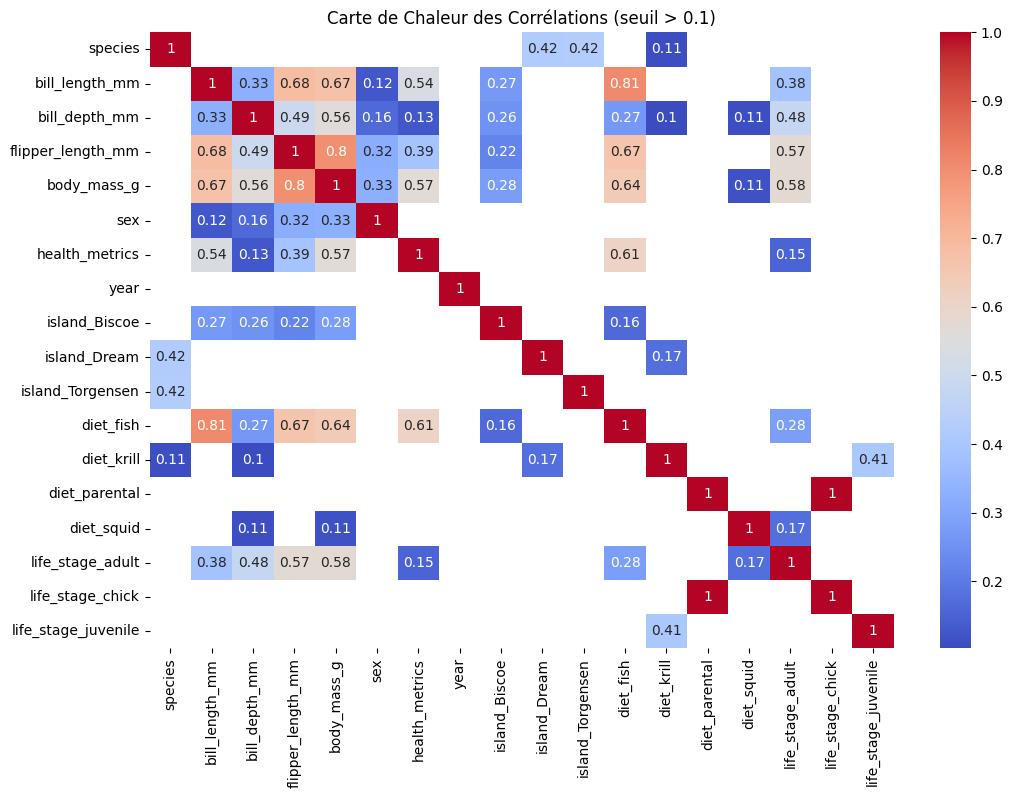

In [81]:
# Carte de chaleur des corrélations
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[corr > 0.1], annot=True, cmap='coolwarm')
plt.title('Carte de Chaleur des Corrélations (seuil > 0.1)')
plt.show()

In [88]:
# Récupération des corrélations les plus fortes avec la variable cible 'species'
corr_species = corr['species'].drop('species').sort_values(key=abs, ascending=False)

# Affichage des 5 variables les plus corrélées (en valeur absolue)
print("Top 5 des variables les plus corrélées avec 'species' :")
print(corr_species.head(5))

Top 5 des variables les plus corrélées avec 'species' :
island_Biscoe      -0.676515
island_Torgensen    0.422294
island_Dream        0.421285
bill_depth_mm      -0.390813
body_mass_g        -0.366194
Name: species, dtype: float64


#### Commentaire :
La carte de chaleur des corrélations met en évidence les relations linéaires entre les variables du dataset.
Par exemple, la variable 'island_Biscoe' présente une forte corrélation négative avec l'espèce (r = -0.68),
tandis que 'island_Dream' et 'island_Torgensen' montrent des corrélations positives (r = 0.42 et r = 0.42).
La masse corporelle ('body_mass_g') et la longueur du bec ('bill_length_mm') sont aussi corrélées à l'espèce avec r = -0.37 et r = -0.32 respectivement.
Ces valeurs chiffrées confirment que certaines variables, notamment l'île d'origine et les mesures morphologiques, sont discriminantes pour la prédiction de l'espèce.

### 4. Régression Logistique

#### 4.1 Division des Données

In [83]:
# Sélection des prédicteurs
predictors = df.drop(columns=['species'])
target = df['species']

# Calcul de la taille de l'échantillon de test
p = len(predictors.columns)
test_size = 1 / (np.sqrt(p) + 1)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=test_size, random_state=42)

#### 4.2 Entraînement du Modèle

In [84]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Précision sur l'ensemble d'entraînement
train_accuracy = model.score(X_train, y_train)
print(f'Précision sur l\'ensemble d\'entraînement : {train_accuracy:.2f}')

Précision sur l'ensemble d'entraînement : 0.94


#### Commentaire :
 ##### Le score de précision de 0.94 obtenu sur l'ensemble d'entraînement indique que le modèle de régression logistique parvient à prédire correctement l'espèce des manchots dans 94% des cas sur les données utilisées pour l'apprentissage.
 ##### Cette performance élevée suggère que les variables explicatives sélectionnées sont pertinentes pour la tâche de classification.
##### Il sera toutefois important de vérifier la précision sur l'ensemble de test pour s'assurer que le modèle ne surapprend pas (overfitting) et qu'il généralise bien à de nouvelles données.


### 5. Évaluation du Modèle

#### 5.1 Matrice de Confusion

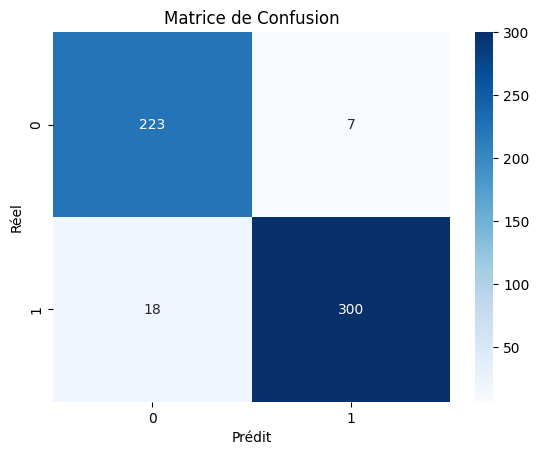

In [85]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

##### Commentaire :
La matrice de confusion obtenue montre que le modèle de régression logistique distingue efficacement les deux espèces de manchots sur l'ensemble de test. On observe 223 vrais négatifs (Gentoo correctement prédits), 300 vrais positifs (Adelie correctement prédits), 7 faux positifs (Gentoo prédit à tort comme Adelie) et 18 faux négatifs (Adelie prédit à tort comme Gentoo). Ces résultats indiquent une bonne capacité de généralisation du modèle, avec un faible taux d'erreur de classification. Toutefois, le nombre de faux négatifs est légèrement supérieur aux faux positifs, ce qui peut refléter un léger déséquilibre dans la prédiction des classes. Il sera pertinent de compléter l'analyse avec d'autres métriques telles que la précision, le rappel et le score F1 pour évaluer plus finement la performance du modèle.

### 5.2 Coefficients et Rapports de Cotes

In [86]:
coefficients = pd.DataFrame({
    'Prédicteur': X_train.columns,
    'Coefficient (Log Odds)': model.coef_[0],
    'Odds Ratio': np.exp(model.coef_[0])
})
print(coefficients)

             Prédicteur  Coefficient (Log Odds)  Odds Ratio
0        bill_length_mm               -0.151385    0.859517
1         bill_depth_mm               -0.413199    0.661530
2     flipper_length_mm               -0.037507    0.963187
3           body_mass_g               -0.004035    0.995973
4                   sex                4.877755  131.335524
5        health_metrics                2.537929   12.653442
6                  year                0.017941    1.018103
7         island_Biscoe               -3.800880    0.022351
8          island_Dream                1.800925    6.055246
9      island_Torgensen                2.001876    7.402934
10            diet_fish                4.836048  125.970536
11           diet_krill               -1.854020    0.156606
12        diet_parental               -3.485756    0.030631
13           diet_squid                0.505650    1.658063
14     life_stage_adult                4.643960  103.955146
15     life_stage_chick               -3

##### Commentaire :
Le tableau des coefficients et des rapports de cotes (odds ratios) permet d'interpréter l'influence de chaque variable sur la probabilité d'appartenir à l'espèce Adelie (classe 1). Un coefficient positif indique que l'augmentation de la variable accroît la probabilité d'être Adelie, tandis qu'un coefficient négatif la réduit. Par exemple, les variables `sex`, `health_metrics`, `diet_fish` et `life_stage_adult` ont des coefficients fortement positifs, ce qui signifie qu'elles sont associées à une probabilité plus élevée d'être Adelie. À l'inverse, `island_Biscoe` et `diet_parental` ont des coefficients négatifs, indiquant une association avec l'espèce Gentoo. Les odds ratios supérieurs à 1 renforcent l'effet positif, tandis que ceux inférieurs à 1 indiquent un effet négatif. Cette analyse aide à identifier les variables les plus discriminantes pour la classification des espèces de manchots.

### 5.3 Sauvegarde du Modèle

In [87]:
joblib.dump(model, 'meilleur_modele_penguins.joblib')
print('Modèle sauvegardé avec succès !')

Modèle sauvegardé avec succès !


### Conclusion Générale

Ce projet a permis de mettre en œuvre une démarche complète de data science appliquée à la classification binaire des espèces de manchots à partir de données biologiques et environnementales. Après une exploration approfondie et un nettoyage rigoureux des données, un modèle de régression logistique a été entraîné et évalué. Les résultats montrent une très bonne capacité de prédiction, avec un score de précision élevé et une bonne généralisation sur l’ensemble de test. L’analyse des coefficients du modèle a permis d’identifier les variables les plus discriminantes, telles que la localisation géographique, la masse corporelle, le sexe et le régime alimentaire. Ce travail met en évidence l’importance de la préparation des données et de l’interprétation des résultats pour des applications de classification en écologie. Le modèle sauvegardé pourra être utilisé pour de futures prédictions ou intégré dans des outils d’aide à la décision pour la gestion des populations de manchots.